## Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report



## Data Preparation

In [2]:
#loading data
df=pd.read_csv("framingham_heart_study.csv")
df.drop(['education'],inplace=True,axis=1)
df.rename(columns={'male':'Gender_male'},inplace=True)

In [3]:
df

,Gender_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
#counts of NULL values
df.isnull().sum()

Gender_male          0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# counts of duplicated records
df.duplicated().sum()

np.int64(0)

In [6]:
# Handling Missing values
df.dropna(axis=0,inplace=True)
# Verify that there are no NULL values
df.isnull().sum()

Gender_male        0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
df.shape
df.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

In [8]:
#Splitting Data
x=np.asarray(df.drop('TenYearCHD', axis=1))
y=np.asarray(df['TenYearCHD'])
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 14) (2625,)
Test set: (1126, 14) (1126,)


## Exploratory Data Analysis 

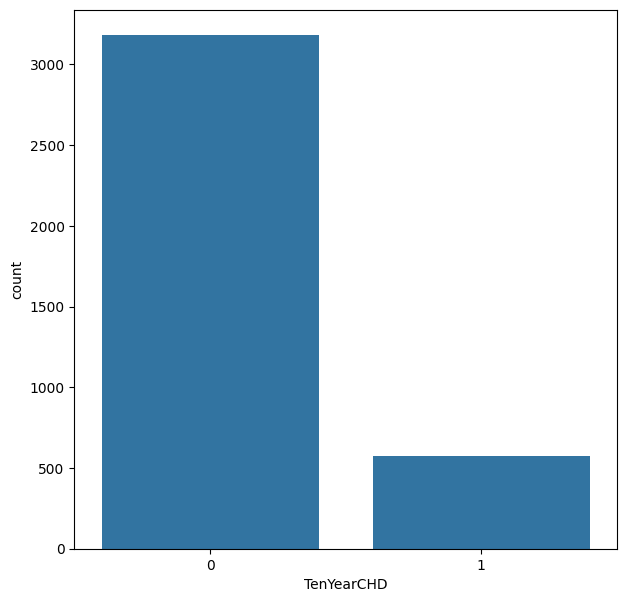

In [9]:
plt.figure(figsize=(7,7))
sns.countplot(x='TenYearCHD',data=df)
plt.show()

In [10]:
#Fitting Logistic Regression Model for Heart Disease Prediction
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [11]:
#Evaluating Logistic Regression Model
print("Logistic Regression Model Accuracy: ",accuracy_score(y_test,y_pred))

Logistic Regression Model Accuracy:  0.8525754884547069


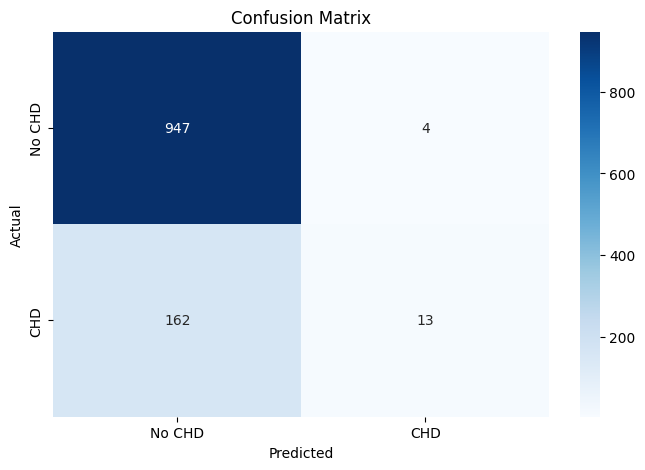

In [12]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [13]:
print(classification_report(y_test,y_pred,target_names=['No CHD', 'CHD']))

              precision    recall  f1-score   support

      No CHD       0.85      1.00      0.92       951
         CHD       0.76      0.07      0.14       175

    accuracy                           0.85      1126
   macro avg       0.81      0.54      0.53      1126
weighted avg       0.84      0.85      0.80      1126

